In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import zipfile
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
!unzip '/content/drive/MyDrive/data_set/Celebrity_pics.zip' -d extracted_files

In [ ]:
img=cv2.imread('extracted_files/Celebrity_pics/Ryan_Gossling/ryan-gosling-v0-96282y2xm4w81.jpg')

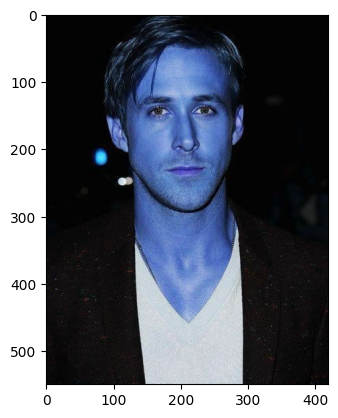

In [ ]:
plt.imshow(img)


In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(550, 420)

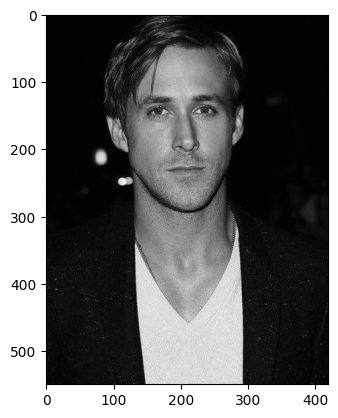

In [ ]:
plt.imshow(gray, cmap='gray')

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

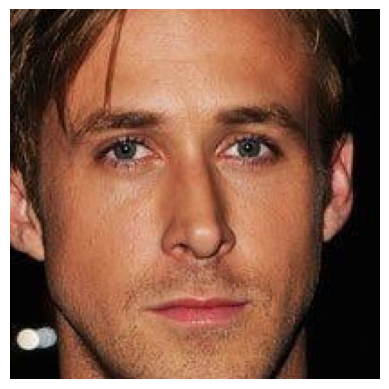

In [ ]:
# Load the image
image = cv2.imread('extracted_files/Celebrity_pics/Ryan_Gossling/ryan-gosling-v0-96282y2xm4w81.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Iterate over detected faces
for (x, y, w, h) in faces:
    # Crop the face from the image
    face = image[y:y+h, x:x+w]

    # Detect eyes within the face region
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    if len(eyes) >= 2:
        # Display the cropped face where both eyes are visible.
      plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
      plt.axis('off')
      plt.show()

In [ ]:
path_to_data = "extracted_files/Celebrity_pics"
path_to_cr_data = "/content/drive/MyDrive/data_set/cropped/"

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

['extracted_files/Celebrity_pics/Sharukh_Khan',
 'extracted_files/Celebrity_pics/Alia_Bhutt',
 'extracted_files/Celebrity_pics/Manju_Varrier',
 'extracted_files/Celebrity_pics/Ryan_Gossling',
 'extracted_files/Celebrity_pics/Nayan_Thara',
 'extracted_files/Celebrity_pics/Fahad_Fazil']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  /content/drive/MyDrive/data_set/cropped/Sharukh_Khan
Generating cropped images in folder:  /content/drive/MyDrive/data_set/cropped/Alia_Bhutt
Generating cropped images in folder:  /content/drive/MyDrive/data_set/cropped/Manju_Varrier
Generating cropped images in folder:  /content/drive/MyDrive/data_set/cropped/Ryan_Gossling
Generating cropped images in folder:  /content/drive/MyDrive/data_set/cropped/Nayan_Thara
Generating cropped images in folder:  /content/drive/MyDrive/data_set/cropped/Fahad_Fazil
